## Import the libraries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from os import listdir
from os.path import isfile, join
import glob
import re
import csv
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 75

## Load data

In [22]:
df = pd.read_csv('./dataset.csv', low_memory=False).replace('?', np.NaN)
df

Accident_Index Location_Easting_OSGR Location_Northing_OSGR  Longitude  \
0       201501BS70001                525130                 180050  -0.198465   
1       201501BS70002                526530                 178560  -0.178838   
2       201501BS70004                524610                 181080   -0.20559   
3       201501BS70005                524420                 181080  -0.208327   
4       201501BS70008                524630                 179040  -0.206022   
...               ...                   ...                    ...        ...   
363201  2015984141415                314050                 579638  -3.348646   
363202  2015984141415                314050                 579638  -3.348646   
363203  2015984141415                314050                 579638  -3.348646   
363204  2015984141415                314050                 579638  -3.348646   
363205  2015984141415                314050                 579638  -3.348646   

         Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0       51.505538             1                  3                   1   
1       51.491836             1                  3                   1   
2        51.51491             1                  3                   1   
3       51.514952             1                  3                   1   
4       51.496572             1                  2                   2   
...           ...           ...                ...                 ...   
363201  55.103676            98                  3                  13   
363202  55.103676            98                  3                  13   
363203  55.103676            98                  3                  13   
363204  55.103676            98                  3                  13   
363205  55.103676            98                  3                  13   

        Number_of_Casualties        Date  ...  1st_Point_of_Impact  \
0                          1  12/01/2015  ...                    1   
1                          1  12/01/2015  ...                    1   
2                          1  12/01/2015  ...                    1   
3                          1  13/01/2015  ...                    1   
4                          1  09/01/2015  ...                    0   
...                      ...         ...  ...                  ...   
363201                     7  31/12/2015  ...                    1   
363202                     7  31/12/2015  ...                    2   
363203                     7  31/12/2015  ...                    2   
363204                     7  31/12/2015  ...                    2   
363205                     7  31/12/2015  ...                    1   

       Was_Vehicle_Left_Hand_Drive?  Journey_Purpose_of_Driver Sex_of_Driver  \
0                                 1                          1             1   
1                                 1                          6             1   
2                                 1                          6             1   
3                                 1                          6             1   
4                                 1                          2             1   
...                             ...                        ...           ...   
363201                            1                          6             1   
363202                            1                          6             1   
363203                            1                          6             1   
363204                            1                          6             1   
363205                            1                          6             2   

        Age_of_Driver  Age_Band_of_Driver  Engine_Capacity_(CC)  \
0                 NaN                 NaN                  2143   
1                 NaN                 NaN                  1600   
2                  30                   6                  1686   
3                 NaN                 NaN                   NaN   
4       

### General info


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363206 entries, 0 to 363205
Data columns (total 67 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_Index                               363206 non-null  object
 1   Location_Easting_OSGR                        363133 non-null  object
 2   Location_Northing_OSGR                       363133 non-null  object
 3   Longitude                                    363133 non-null  object
 4   Latitude                                     363133 non-null  object
 5   Police_Force                                 363206 non-null  int64 
 6   Accident_Severity                            363206 non-null  int64 
 7   Number_of_Vehicles                           363206 non-null  int64 
 8   Number_of_Casualties                         363206 non-null  int64 
 9   Date                                         363206 non-null  object
 

## Descriptive statistics

In [24]:
def my_df_describe(df):
    
    objects = []
    numerics = []
    for c in df:
        if (df[c].dtype == object):
            objects.append(c)
        else:
            numerics.append(c)
            
    for col_name in df.columns:
        
        if df[col_name].dtypes == 'object':
            unique_cat = len(df[col_name].unique())
            print("Attribute '{col_name}' has '{unique_cat}' unique categories".format(col_name=col_name, unique_cat=unique_cat))
        
    #return df[numerics].apply(pd.value_counts)
    return df[numerics].describe()

#my_df_describe(df)

## Find missing values by column

In [25]:
# Missing values by column
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing!=0]
missing

2nd_Road_Class                                 151306
Junction_Control                               149831
Age_of_Vehicle                                 107099
Engine_Capacity_(CC)                            93341
Propulsion_Code                                 92631
Casualty_IMD_Decile                             69567
Driver_Home_Area_Type                           60699
Casualty_Home_Area_Type                         39786
Age_Band_of_Driver                              35868
Age_of_Driver                                   35868
LSOA_of_Accident_Location                       21235
Age_Band_of_Casualty                             5569
Age_of_Casualty                                  5569
2nd_Road_Number                                  1932
Was_Vehicle_Left_Hand_Drive?                     1483
Car_Passenger                                     762
Road_Surface_Conditions                           612
Towing_and_Articulation                           379
Pedestrian_Crossing-Human_Co

## Remove the missing values

In [26]:
df_clean = df.dropna(axis=0)
df_clean

Accident_Index Location_Easting_OSGR Location_Northing_OSGR  Longitude  \
2       201501BS70004                524610                 181080   -0.20559   
6       201501BS70009                525480                 179530   -0.19361   
7       201501BS70009                525480                 179530   -0.19361   
8       201501BS70010                526890                 178940  -0.173519   
12      201501BS70012                524170                 180930   -0.21198   
...               ...                   ...                    ...        ...   
328093  2015556000449                368582                  90133  -2.446327   
328094  2015556000449                368582                  90133  -2.446327   
328095  2015556000449                368582                  90133  -2.446327   
328096  2015556000449                368582                  90133  -2.446327   
328097  2015556000449                368582                  90133  -2.446327   

         Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
2        51.51491             1                  3                   1   
6       51.500788             1                  3                   2   
7       51.500788             1                  3                   2   
8       51.495171             1                  3                   2   
12      51.513659             1                  3                   2   
...           ...           ...                ...                 ...   
328093  50.709975            55                  3                   3   
328094  50.709975            55                  3                   3   
328095  50.709975            55                  3                   3   
328096  50.709975            55                  3                   3   
328097  50.709975            55                  3                   3   

        Number_of_Casualties        Date  ...  1st_Point_of_Impact  \
2                          1  12/01/2015  ...                    1   
6                          1  15/01/2015  ...                    1   
7                          1  15/01/2015  ...                    3   
8                          1  15/01/2015  ...                    4   
12                         1  16/01/2015  ...                    3   
...                      ...         ...  ...                  ...   
328093                     2  14/05/2015  ...                    1   
328094                     2  14/05/2015  ...                    3   
328095                     2  14/05/2015  ...                    3   
328096                     2  14/05/2015  ...                    1   
328097                     2  14/05/2015  ...                    3   

       Was_Vehicle_Left_Hand_Drive?  Journey_Purpose_of_Driver Sex_of_Driver  \
2                                 1                          6             1   
6                                 1                          6             1   
7                                 1                          1             1   
8                                 1                          6             1   
12                                1                          6             2   
...                             ...                        ...           ...   
328093                            1                          6             1   
328094                            1                          6             2   
328095                            1                          6             2   
328096                            1                          6             1   
328097                            1                          6             2   

        Age_of_Driver  Age_Band_of_Driver  Engine_Capacity_(CC)  \
2                  30                   6                  1686   
6                  37                   7                   124   
7                  44                   7                  2402   
8                  37                   7                  1461   
12      

In [27]:
def plot_histogram(x):
    plt.figure(figsize=(12,8))
    plt.hist(x,color='brown',alpha=0.8, histtype='bar', ec='black'),
    plt.title('Histogram of {var}'.format(var=x.name))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

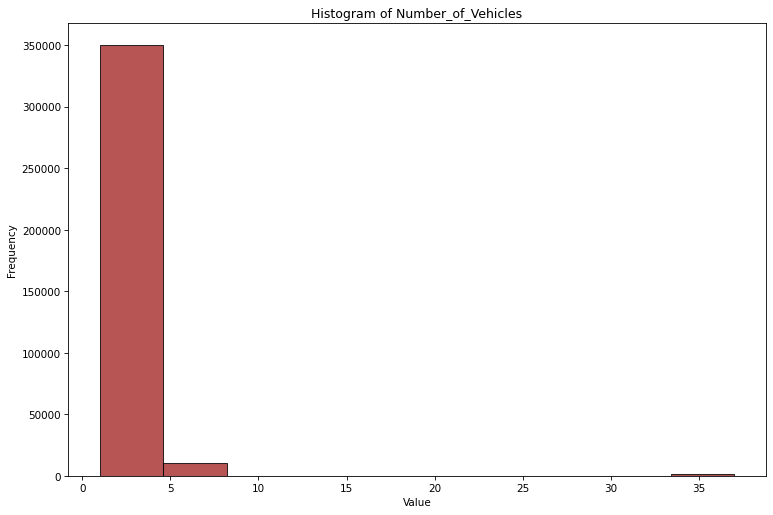

In [28]:
plot_histogram(df['Number_of_Vehicles'])

## Outlier detection

In [29]:
def find_outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x<floor)|(x>ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [30]:
indices, values = find_outliers(df['Age_of_Driver'].astype(float))
print(np.sort(values))

[]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



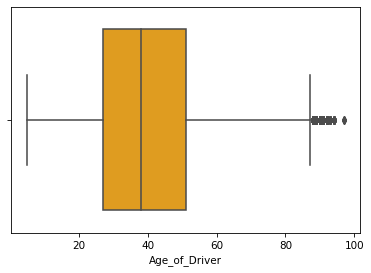

In [31]:
sns.boxplot(df_clean['Age_of_Driver'].astype(float),color='orange');

In [32]:
fig = px.scatter(df_clean.sort_values('Age_of_Driver'), x="Age_of_Driver", y="Accident_Severity", marginal_x="histogram", marginal_y="rug", color='Accident_Severity',
                title='Marginal Plot of Age and Accident Severity', labels={
                     "Age_of_Driver": "Age of Driver (Years)",
                     "Accident_Severity": "Accident Severity"})

fig.show() 

In [33]:
df_clean['Time'] = df_clean['Time'].astype('datetime64[ns]')
df_clean['Time'] = df_clean['Time'].dt.time

C:\Users\lonew\AppData\Local\Temp/ipykernel_17468/1230419796.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lonew\AppData\Local\Temp/ipykernel_17468/1230419796.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
df_clean.groupby('Date').describe()

Police_Force                                                       \
                  count     mean      std     min      25%      50%      75%   
Date                                                                           
01/01/2015    128.00000 20.97656 17.04116 1.00000  6.00000 14.00000 31.00000   
01/02/2015    186.00000 16.25806 16.67100 1.00000  1.00000 11.00000 31.00000   
01/03/2015    164.00000 22.54268 17.68967 1.00000  5.00000 20.00000 42.00000   
01/04/2015    289.00000 23.34256 17.66894 1.00000  7.00000 16.00000 43.00000   
01/05/2015    312.00000 23.15385 17.45869 1.00000  7.00000 20.00000 42.00000   
...                 ...      ...      ...     ...      ...      ...      ...   
31/05/2015    210.00000 25.41429 18.59708 1.00000  7.75000 21.00000 44.00000   
31/07/2015    363.00000 25.68871 18.58130 1.00000  7.00000 21.00000 44.00000   
31/08/2015    263.00000 26.81369 16.97595 1.00000 12.50000 31.00000 43.00000   
31/10/2015    286.00000 22.04545 17.07120 1.00000  6.00000 17.00000 36.00000   
31/12/2015    249.00000 22.50602 19.22786 1.00000  4.00000 16.00000 44.00000   

                    Accident_Severity          ... Vehicle_Reference_df  \
                max             count    mean  ...                  75%   
Date                                           ...                        
01/01/2015 55.00000         128.00000 2.80469  ...              2.00000   
01/02/2015 55.00000         186.00000 2.94086  ...              2.00000   
01/03/2015 54.00000         164.00000 2.90244  ...              2.00000   
01/04/2015 54.00000         289.00000 2.93772  ...              2.00000   
01/05/2015 55.00000         312.00000 2.90705  ...              2.00000   
...             ...               ...     ...  ...                  ...   
31/05/2015 55.00000         210.00000 2.92857  ...              2.00000   
31/07/2015 55.00000         363.00000 2.89532  ...              2.00000   
31/08/2015 54.00000         263.00000 2.77947  ...              2.00000   
31/10/2015 54.00000         286.00000 2.84266  ...              2.00000   
31/12/2015 55.00000         249.00000 2.89157  ...              2.00000   

                   Sex_of_Driver                                          \
               max         count    mean     std     min     25%     50%   
Date                                                                       
01/01/2015 3.00000     128.00000 1.18750 0.39185 1.00000 1.00000 1.00000   
01/02/2015 2.00000     186.00000 1.34409 0.47635 1.00000 1.00000 1.00000   
01/03/2015 4.00000     164.00000 1.25610 0.43781 1.00000 1.00000 1.00000   
01/04/2015 4.00000     289.00000 1.37024 0.48371 1.00000 1.00000 1.00000   
01/05/2015 5.00000     312.00000 1.41667 0.53143 1.00000 1.00000 1.00000   
...            ...           ...     ...     ...     ...     ...     ...   
31/05/2015 4.00000     210.00000 1.32857 0.48087 1.00000 1.00000 1.00000   
31/07/2015 4.00000     363.00000 1.32507 0.46905 1.00000 1.00000 1.00000   
31/08/2015 3.00000     263.00000 1.36882 0.49895 1.00000 1.00000 1.00000   
31/10/2015 5.00000     286.00000 1.38112 0.49367 1.00000 1.00000 1.00000   
31/12/2015 3.00000     249.00000 1.33735 0.47376 1.00000 1.00000 1.00000   

                            
               75%     max  
Date                        
01/01/2015 1.00000 2.00000  
01/02/2015 2.00000 2.00000  
01/03/2015 2.00000 2.00000  
01/04/2015 2.00000 2.00000  
01/05/2015 2.00000 3.00000  
...            ...     ...  
31/05/2015 2.00000 3.00000  
31/07/2015 2.00000 2.00000  
31/08/2015 2.00000 3.00000  
31/10/2015 2.00000 3.00000  
31/12/2015 2.00000 2.00000  

[365 rows x 160 columns]

In [35]:
df_clean.sort_values('Date').groupby('Date').describe()

Police_Force                                                       \
                  count     mean      std     min      25%      50%      75%   
Date                                                                           
01/01/2015    128.00000 20.97656 17.04116 1.00000  6.00000 14.00000 31.00000   
01/02/2015    186.00000 16.25806 16.67100 1.00000  1.00000 11.00000 31.00000   
01/03/2015    164.00000 22.54268 17.68967 1.00000  5.00000 20.00000 42.00000   
01/04/2015    289.00000 23.34256 17.66894 1.00000  7.00000 16.00000 43.00000   
01/05/2015    312.00000 23.15385 17.45869 1.00000  7.00000 20.00000 42.00000   
...                 ...      ...      ...     ...      ...      ...      ...   
31/05/2015    210.00000 25.41429 18.59708 1.00000  7.75000 21.00000 44.00000   
31/07/2015    363.00000 25.68871 18.58130 1.00000  7.00000 21.00000 44.00000   
31/08/2015    263.00000 26.81369 16.97595 1.00000 12.50000 31.00000 43.00000   
31/10/2015    286.00000 22.04545 17.07120 1.00000  6.00000 17.00000 36.00000   
31/12/2015    249.00000 22.50602 19.22786 1.00000  4.00000 16.00000 44.00000   

                    Accident_Severity          ... Vehicle_Reference_df  \
                max             count    mean  ...                  75%   
Date                                           ...                        
01/01/2015 55.00000         128.00000 2.80469  ...              2.00000   
01/02/2015 55.00000         186.00000 2.94086  ...              2.00000   
01/03/2015 54.00000         164.00000 2.90244  ...              2.00000   
01/04/2015 54.00000         289.00000 2.93772  ...              2.00000   
01/05/2015 55.00000         312.00000 2.90705  ...              2.00000   
...             ...               ...     ...  ...                  ...   
31/05/2015 55.00000         210.00000 2.92857  ...              2.00000   
31/07/2015 55.00000         363.00000 2.89532  ...              2.00000   
31/08/2015 54.00000         263.00000 2.77947  ...              2.00000   
31/10/2015 54.00000         286.00000 2.84266  ...              2.00000   
31/12/2015 55.00000         249.00000 2.89157  ...              2.00000   

                   Sex_of_Driver                                          \
               max         count    mean     std     min     25%     50%   
Date                                                                       
01/01/2015 3.00000     128.00000 1.18750 0.39185 1.00000 1.00000 1.00000   
01/02/2015 2.00000     186.00000 1.34409 0.47635 1.00000 1.00000 1.00000   
01/03/2015 4.00000     164.00000 1.25610 0.43781 1.00000 1.00000 1.00000   
01/04/2015 4.00000     289.00000 1.37024 0.48371 1.00000 1.00000 1.00000   
01/05/2015 5.00000     312.00000 1.41667 0.53143 1.00000 1.00000 1.00000   
...            ...           ...     ...     ...     ...     ...     ...   
31/05/2015 4.00000     210.00000 1.32857 0.48087 1.00000 1.00000 1.00000   
31/07/2015 4.00000     363.00000 1.32507 0.46905 1.00000 1.00000 1.00000   
31/08/2015 3.00000     263.00000 1.36882 0.49895 1.00000 1.00000 1.00000   
31/10/2015 5.00000     286.00000 1.38112 0.49367 1.00000 1.00000 1.00000   
31/12/2015 3.00000     249.00000 1.33735 0.47376 1.00000 1.00000 1.00000   

                            
               75%     max  
Date                        
01/01/2015 1.00000 2.00000  
01/02/2015 2.00000 2.00000  
01/03/2015 2.00000 2.00000  
01/04/2015 2.00000 2.00000  
01/05/2015 2.00000 3.00000  
...            ...     ...  
31/05/2015 2.00000 3.00000  
31/07/2015 2.00000 2.00000  
31/08/2015 2.00000 3.00000  
31/10/2015 2.00000 3.00000  
31/12/2015 2.00000 2.00000  

[365 rows x 160 columns]

In [36]:
date_df = pd.DataFrame(df_clean[['Date']].value_counts()).reset_index().rename(columns={0:'Accidents'}).sort_values('Date')
date_df['Date'] = pd.to_datetime(date_df['Date'])

date_df

Date  Accidents
361 2015-01-01        128
352 2015-01-02        186
359 2015-01-03        164
231 2015-01-04        289
167 2015-01-05        312
..         ...        ...
340 2015-05-31        210
63  2015-07-31        363
273 2015-08-31        263
234 2015-10-31        286
300 2015-12-31        249

[365 rows x 2 columns]

In [37]:
df_clean[['Time']]

Time
2       18:08:00
6       09:56:00
7       09:56:00
8       09:09:00
12      06:20:00
...          ...
328093  08:55:00
328094  08:55:00
328095  08:55:00
328096  08:55:00
328097  08:55:00

[111409 rows x 1 columns]

<AxesSubplot:xlabel='Date'>

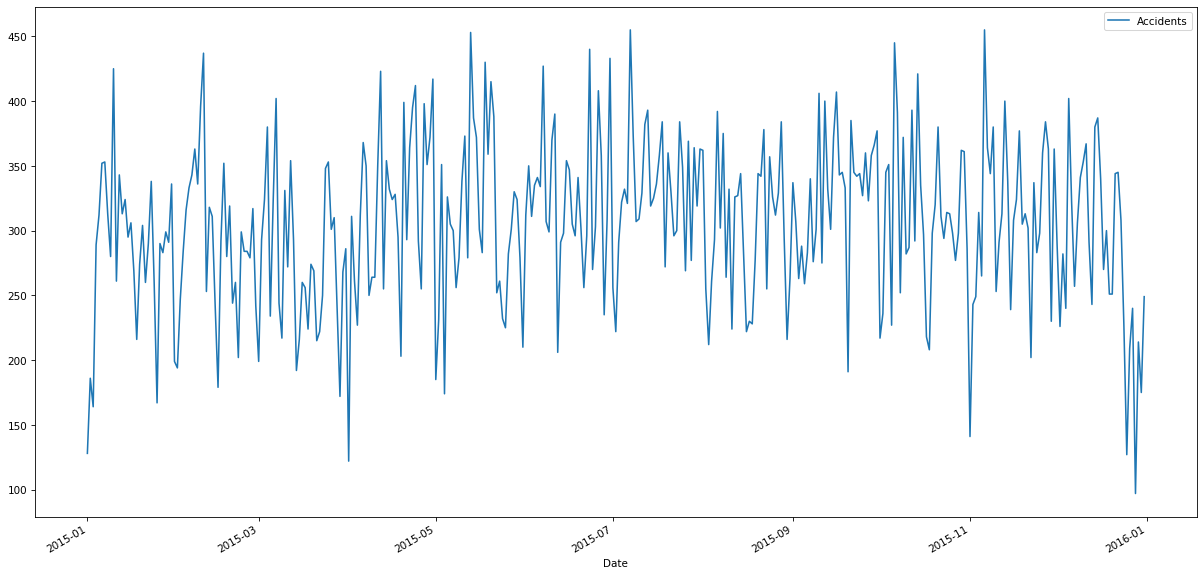

In [38]:
date_df.plot(x='Date',y='Accidents',figsize=(20,10))